# Unsupervised Melek ML

### Clustering

In [1]:
# importing necessary package and setting it
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import time
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 60, 'linewidths':0}

### Kmeans
K-Means is the ‘go-to’ clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there’s an implementation in almost any statistical or machine learning tool you care to use). K-Means has a few problems however.

So, in summary, here’s how K-Means seems to stack up against out desiderata: * Don’t be wrong!: K-means is going to throw points into clusters whether they belong or not; it also assumes you clusters are globular. K-Means scores very poorly on this point. * Intuitive parameters: If you have a good intuition for how many clusters the dataset your exploring has then great, otherwise you might have a problem. * Stability: Hopefully the clustering is stable for your data. Best to have many runs and check though. * Performance: This is K-Means big win. It’s a simple algorithm and with the right tricks and optimizations can be made exceptionally efficient. There are few algorithms that can compete with K-Means for performance. If you have truly huge data then K-Means might be your only option.

### Heuristic (Aglomeratif)
Agglomerative clustering is really a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it’s own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. 

So, in summary:

Don’t be wrong!: We have gotten rid of the globular assumption, but we are still assuming that all the data belongs in clusters with no noise.
Intuitive parameters: Similar to K-Means we are stuck choosing the number of clusters (not easy in EDA), or trying to discern some natural parameter value from a plot that may or may not have any obvious natural choices.
Stability: Agglomerative clustering is stable across runs and the dendrogram shows how it varies over parameter choices (in a reasonably stable way), so stability is a strong point.
Performance: Performance can be good if you get the right implementation.

### DBSCAN
DBSCAN is a density based algorithm – it assumes clusters for dense regions. It is also the first actual clustering algorithm we’ve looked at: it doesn’t require that every point be assigned to a cluster and hence doesn’t partition the data, but instead extracts the ‘dense’ clusters and leaves sparse background classified as ‘noise’.

So, in summary:

Don’t be wrong!: Clusters don’t need to be globular, and won’t have noise lumped in; varying density clusters may cause problems, but that is more in the form of insufficient detail rather than explicitly wrong. DBSCAN is the first clustering algorithm we’ve looked at that actually meets the ‘Don’t be wrong!’ requirement.
Intuitive parameters: Epsilon is a distance value, so you can survey the distribution of distances in your dataset to attempt to get an idea of where it should lie. In practice, however, this isn’t an especially intuitive parameter, nor is it easy to get right.
Stability: DBSCAN is stable across runs (and to some extent subsampling if you re-parameterize well); stability over varying epsilon and min samples is not so good.
Performance: This is DBSCAN’s other great strength; few clustering algorithms can tackle datasets as large as DBSCAN can.


In [2]:
#Generate the data to see the differences between cluster. Using 1500 data points.
np.random.seed(0)
n_samples = 1500

#Creating 4 kind of data
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

#Save the data set into one list
dts=[noisy_circles[0],noisy_moons[0],blobs[0],no_structure[0]]
data_set_c=[pd.DataFrame(StandardScaler().fit_transform(d)) for d in dts]

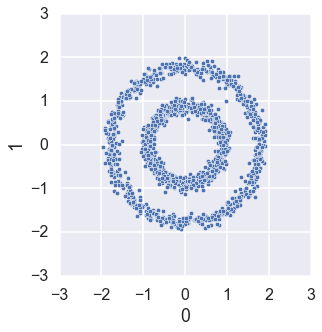

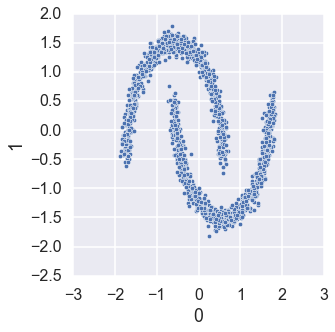

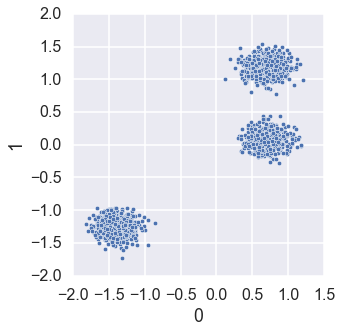

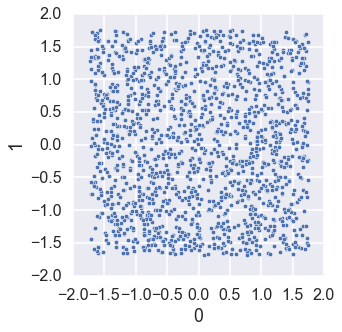

In [3]:
#Plotting 4 data set
for i in range(4):
    sns.pairplot(x_vars=[0], y_vars=[1],data=data_set_c[i],size=5, aspect=1)

In [18]:
# Preparing the model
km = KMeans(n_clusters=3)
ha = AgglomerativeClustering(
    linkage="average", affinity="cityblock", n_clusters=3)
db = DBSCAN(eps=0.08)

#For every data set, do the fitting
data_set_c2=[]
for d in data_set_c:
    dk=d.copy()
    
    km.fit(dk)
    km_p=km.predict(dk)
    ha.fit(dk)
    ha_p=ha.labels_.astype(np.int)
    db.fit(dk)
    db_p=db.labels_.astype(np.int)
    
    dk['kmeans']=km_p
    dk['heuristic']=ha_p
    dk['dbscan']=db_p
    data_set_c2.append(dk)

In [19]:
data_set_c2[0].head()

,0,1,kmeans,heuristic,dbscan
0,-1.211679,-1.246886,1,1,0
1,1.663585,0.343009,2,0,1
2,0.979093,-0.009582,0,0,2
3,1.558895,0.670995,2,0,3
4,0.777461,-0.525246,0,0,4


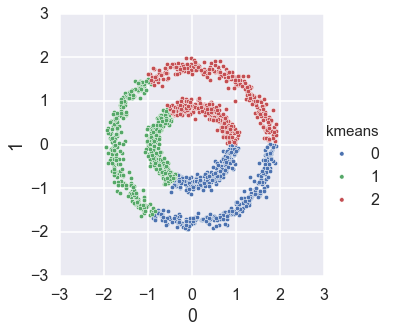

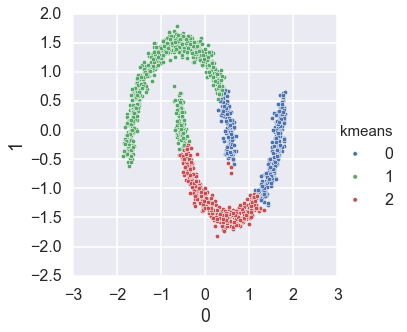

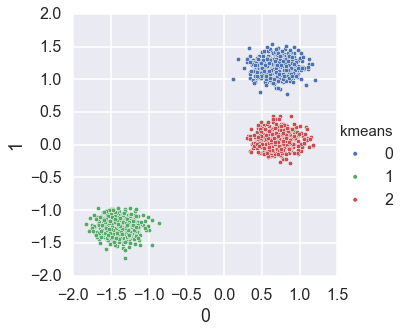

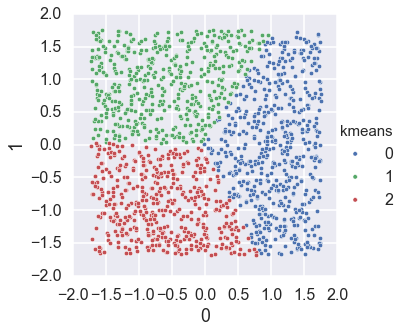

In [20]:
# plotting the Kmeans result
for i in range(4):
    sns.pairplot(x_vars=[0], y_vars=[1],data=data_set_c2[i],hue='kmeans',size=5, aspect=1)

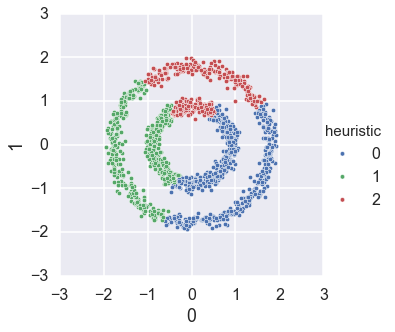

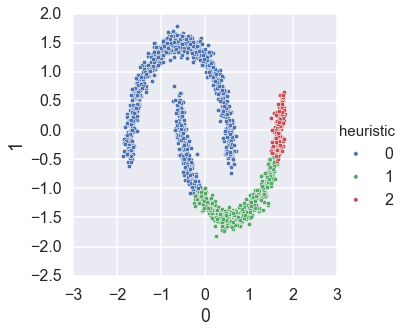

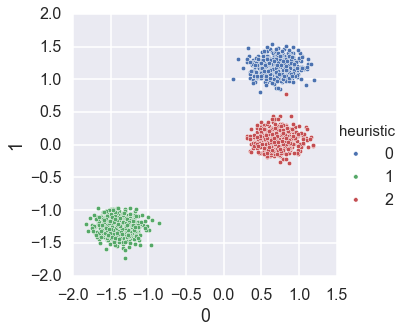

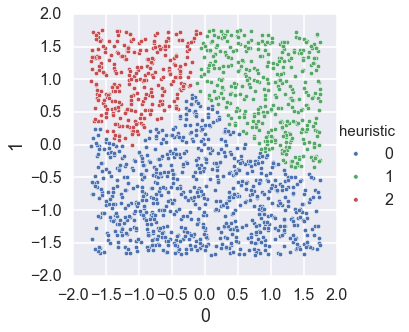

In [21]:
# plotting the Agglomerative result
for i in range(4):
    sns.pairplot(x_vars=[0], y_vars=[1],data=data_set_c2[i],hue='heuristic',size=5, aspect=1)

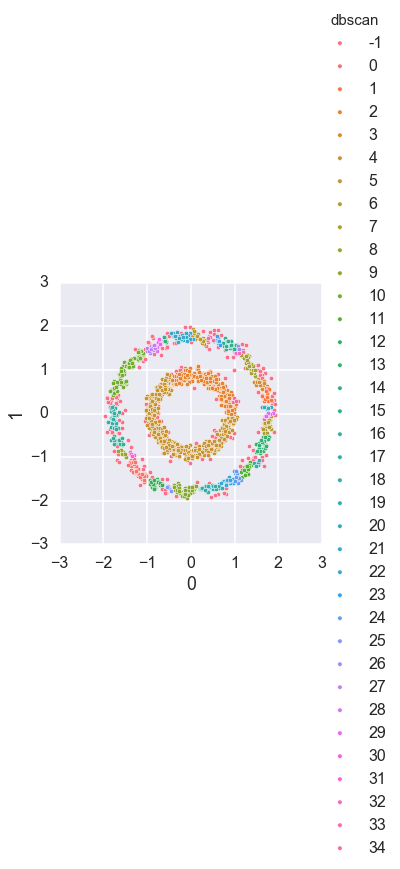

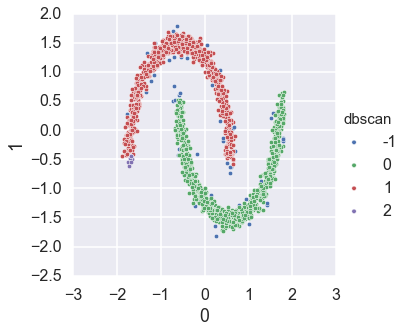

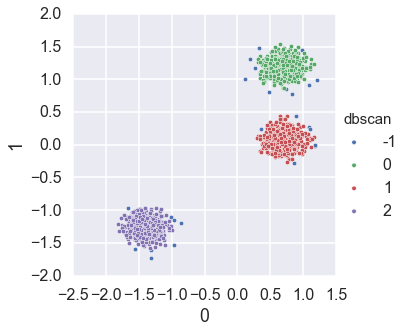

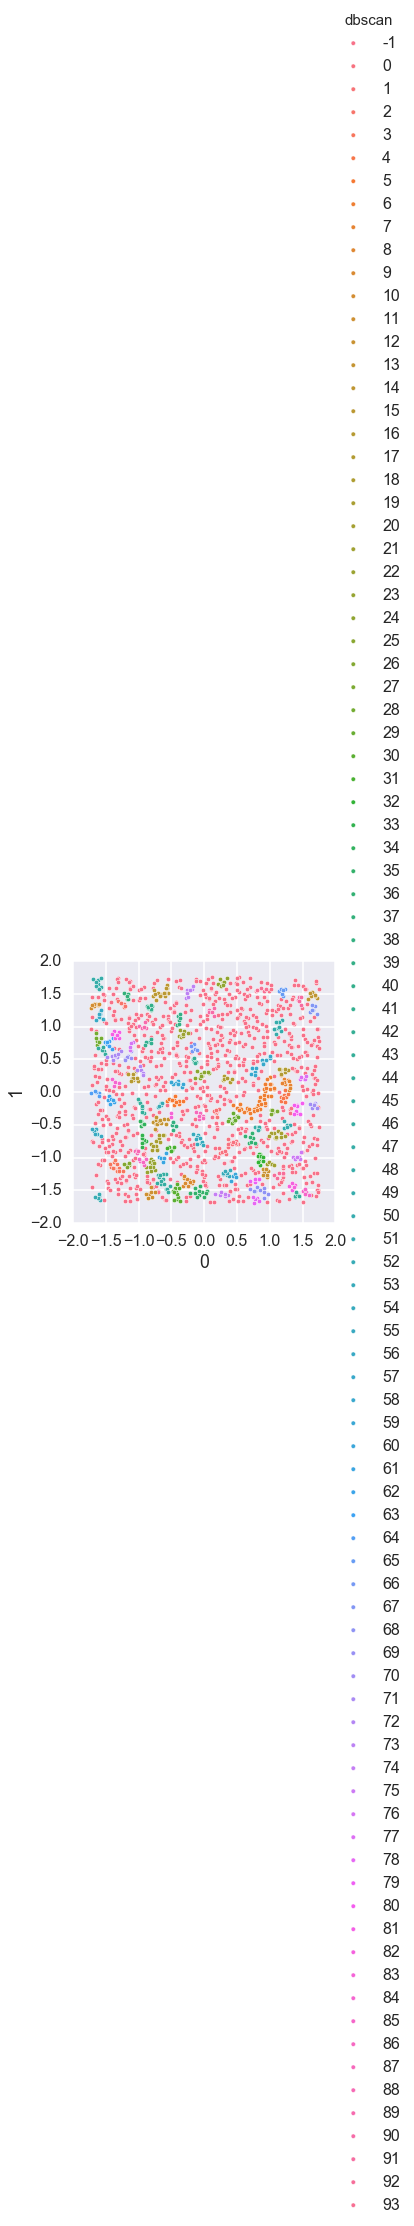

In [22]:
# plotting the DBSCAN result
for i in range(4):
    sns.pairplot(x_vars=[0], y_vars=[1],data=data_set_c2[i],hue='dbscan',size=5, aspect=1)

# Elbow

In [49]:
no_structure_2 = np.random.rand(n_samples, 2), None
k=np.arange(2,20,1)

2.86699986458


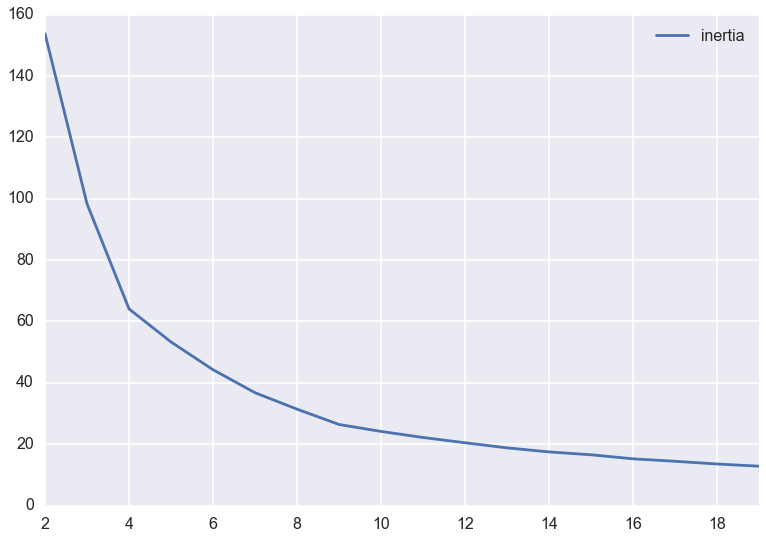

In [56]:
L=time.time()
inertia = []
for k0 in k:
    km=KMeans(n_clusters=k0)
    km.fit(no_structure_2[0])
    inertia.append(km.inertia_)

dElbow=pd.DataFrame({'inertia':inertia},index=k)
dElbow.plot()
print time.time()-L